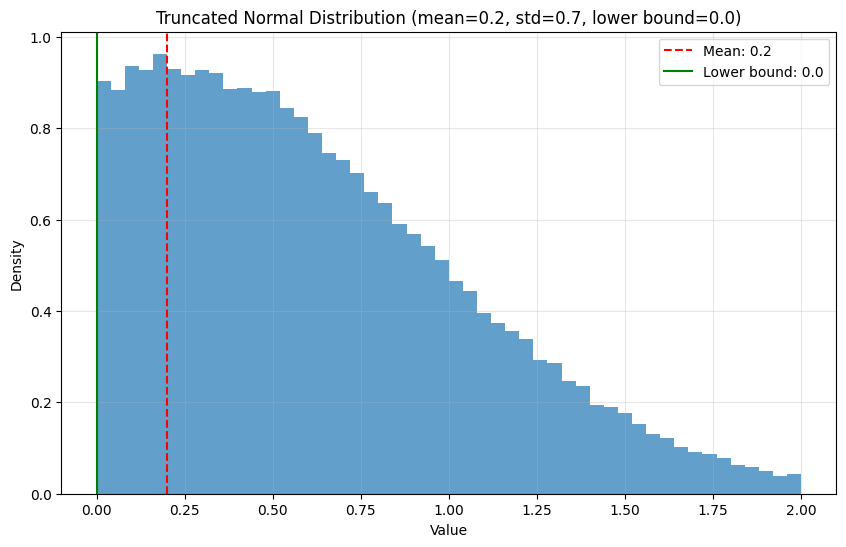

Sample mean: 0.6259
Sample std: 0.4373


In [1]:
import torch
import matplotlib.pyplot as plt

# Create a larger sample of truncated normal values for visualization
num_samples = 100000
samples = torch.empty(num_samples)
mean = 0.2
std = 0.7
lower_bound = 0.0
torch.nn.init.trunc_normal_(samples, mean=mean, std=std, a=lower_bound)

# Create a histogram to visualize the truncated normal distribution
plt.figure(figsize=(10, 6))
plt.hist(samples.numpy(), bins=50, density=True, alpha=0.7)
plt.axvline(x=mean, color="r", linestyle="--", label=f"Mean: {mean}")
plt.axvline(
    x=lower_bound, color="g", linestyle="-", label=f"Lower bound: {lower_bound}"
)
plt.title(
    f"Truncated Normal Distribution (mean={mean}, std={std}, lower bound={lower_bound})"
)
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Sample mean: {samples.mean().item():.4f}")
print(f"Sample std: {samples.std().item():.4f}")

In [2]:
from spherinator.models.truncated_normal_distribution import (
    truncated_normal_distribution,
)
import torch

recon = torch.tensor([0.1, -0.1, 0.5])
batch = torch.tensor([0.2, 0.2, 0.5])
error = torch.tensor([0.7, 0.7, 1e-4])

p = truncated_normal_distribution(recon, mu=batch, sigma=error, a=0.0, b=1.0)
nll = -torch.log(p)
p, nll

(tensor([3.4611e-01, 1.0000e-05, 1.2052e+03]),
 tensor([ 1.0610, 11.5129, -7.0944]))

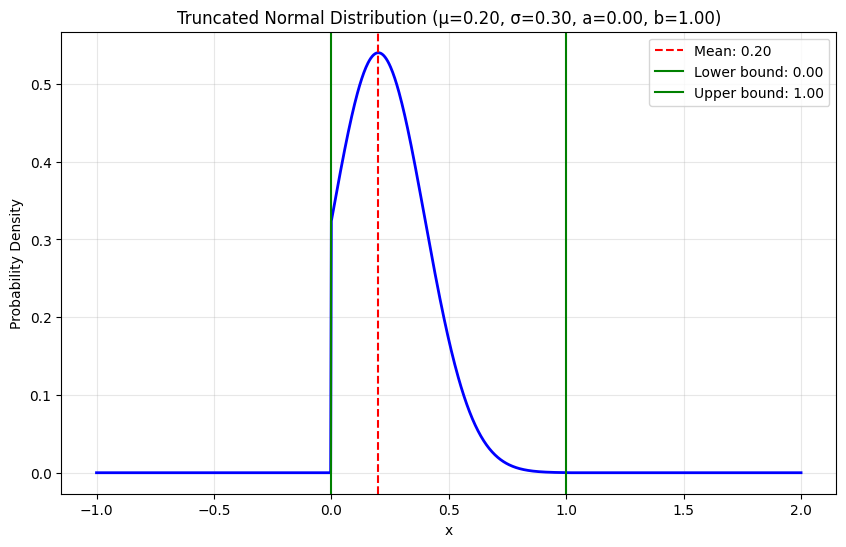

In [3]:
import matplotlib.pyplot as plt

mu = torch.tensor(0.2)
sigma = torch.tensor(0.3)
a = 0.0
b = 1.0

# Create x values between a and b for plotting
x_values = torch.linspace(-1.0, 2.0, 1000)

# Calculate truncated normal PDF for each x value
pdf_values = torch.zeros_like(x_values)
for i, x_val in enumerate(x_values):
    pdf_values[i] = truncated_normal_distribution(x_val, mu=mu, sigma=sigma, a=a, b=b)

# Plot the truncated normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x_values.numpy(), pdf_values.numpy(), "b-", linewidth=2)
plt.axvline(x=mu, color="r", linestyle="--", label=f"Mean: {mu.item():.2f}")
plt.axvline(x=a, color="g", linestyle="-", label=f"Lower bound: {a:.2f}")
plt.axvline(x=b, color="g", linestyle="-", label=f"Upper bound: {b:.2f}")
plt.title(
    f"Truncated Normal Distribution (μ={mu.item():.2f}, σ={sigma.item():.2f}, a={a:.2f}, b={b:.2f})"
)
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()